In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('LASP.csv')

In [3]:
df=pd.DataFrame(data=df)

In [5]:
df.head().transpose()

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [7]:
df.tail().transpose()

,609,610,611,612,613
Loan_ID,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No
Dependents,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,No,No,Yes
ApplicantIncome,2900,4106,8072,7583,4583
CoapplicantIncome,0.0,0.0,240.0,0.0,0.0
LoanAmount,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,180.0,360.0,360.0,360.0


In [8]:
df.sample(10).transpose()

,227,248,18,32,415,265,42,354,364,432
Loan_ID,LP001758,LP001824,LP001038,LP001097,LP002337,LP001875,LP001123,LP002143,LP002180,LP002386
Gender,Male,Male,Male,Male,Female,Male,Male,Female,Male,Male
Married,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No
Dependents,2,1,0,1,0,0,0,0,0,0
Education,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,No,Yes,No,No,No,No,Yes,NaN
ApplicantIncome,6250,2882,4887,4692,2995,4095,2400,2423,6822,12876
CoapplicantIncome,1695.0,1843.0,0.0,0.0,0.0,3447.0,0.0,505.0,0.0,0.0
LoanAmount,210.0,123.0,133.0,106.0,60.0,151.0,75.0,130.0,141.0,405.0
Loan_Amount_Term,360.0,480.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0


In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.shape

(614, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
print('Number of Categories: ')
for ColName in df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
'Self_Employed','Property_Area','Loan_Status']]:
    
    print('{} = {}'.format(ColName,len(df[ColName].unique())))
    
#rint(“{} = {}”.format(ColName,len(df[ColName].unique())))

Number of Categories: 
Loan_ID = 614
Gender = 3
Married = 3
Dependents = 5
Education = 2
Self_Employed = 3
Property_Area = 3
Loan_Status = 2


In [24]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [25]:
#as per above we can see that gender include nan data

In [26]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
#as per above we can see that married include nan data

Observation: This represents number of categories of particular type of data.
As, Loan_Status which is going to be target variable is having 2 types of data so one will be using Logistic Regression

In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

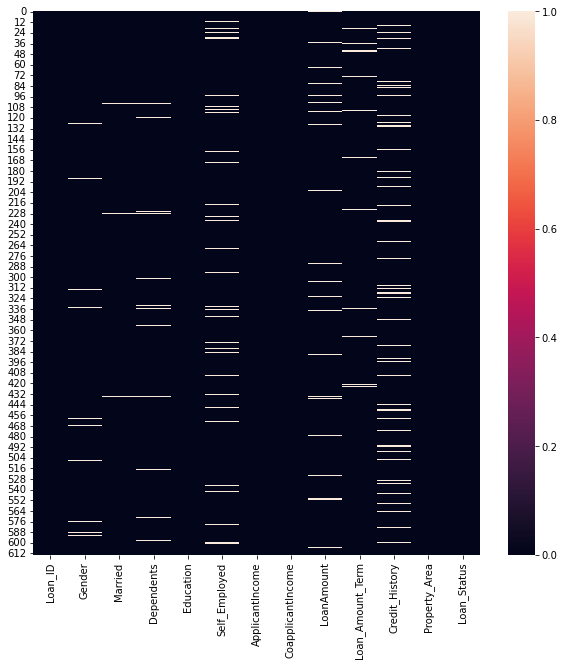

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

In [37]:
#Replacing null values of object column with mode of it.
collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype == "object":
        df[collist[i]].fillna(df[collist[i]].mode()[0], inplace=True)
#Replacing non object values i.e. int64 and float64 null values with mean of it.
collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype != "object":
        df[collist[i]].fillna(df[collist[i]].mean(), inplace=True)

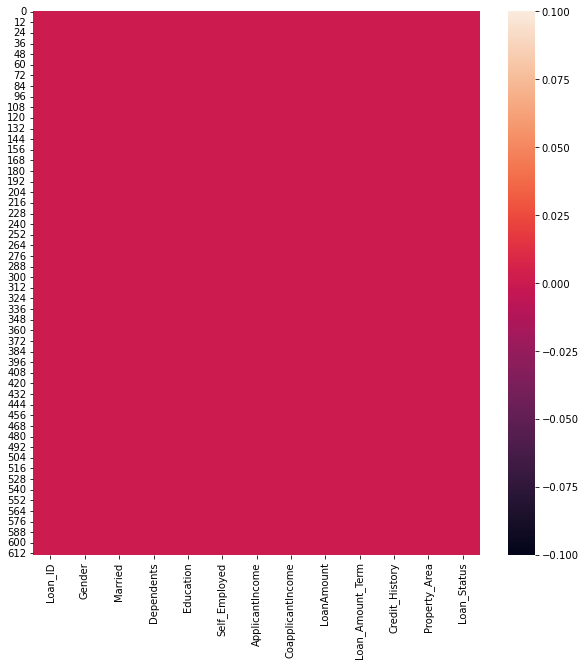

In [38]:
#checking again null values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

In [39]:
#Now all the null values remove  from the datasets

In [40]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

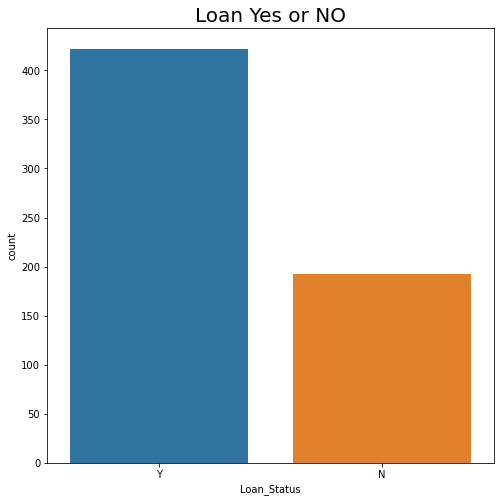

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(x='Loan_Status',data=df)
plt.title('Loan Yes or NO', fontsize=20)
plt.show()


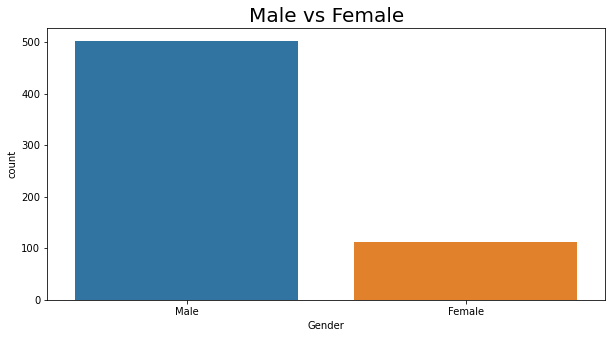

In [42]:
plt.figure(figsize = (10,5)) 
sns.countplot(x="Gender", data=df) 
plt.title("Male vs Female", fontsize = 20) 
plt.show()

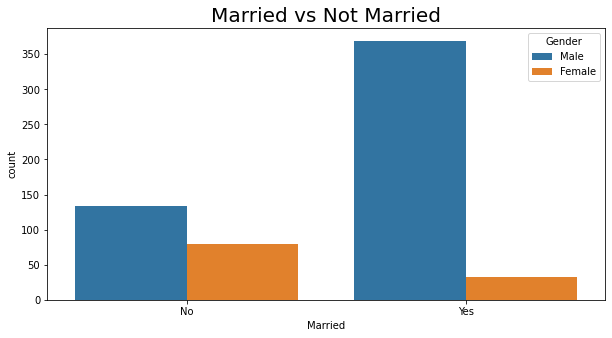

In [49]:
plt.figure(figsize = (10,5)) 
sns.countplot(x='Married',hue='Gender', data=df) 
plt.title('Married vs Not Married', fontsize = 20) 
plt.show()

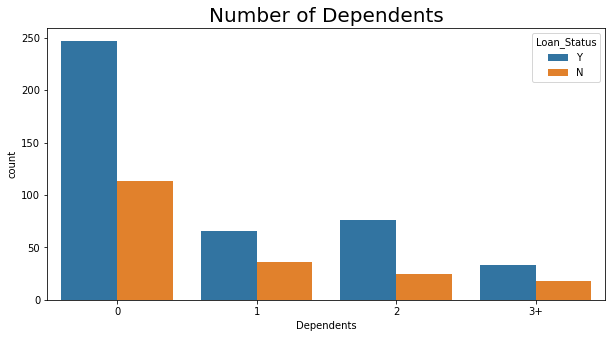

In [53]:
plt.figure(figsize = (10,5))
sns.countplot(x="Dependents",hue='Loan_Status', data=df)
plt.title("Number of Dependents", fontsize = 20)
plt.show()

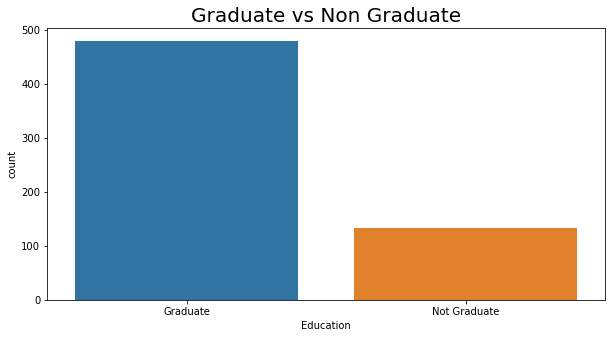

In [54]:
plt.figure(figsize = (10,5))
sns.countplot(x="Education", data=df)
plt.title("Graduate vs Non Graduate", fontsize = 20)
plt.show()

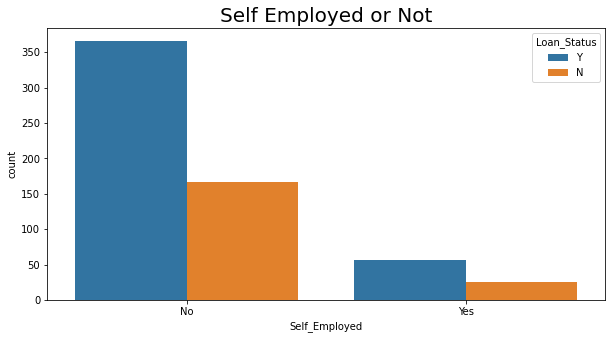

In [59]:
plt.figure(figsize = (10,5))
sns.countplot(x="Self_Employed",hue='Loan_Status' ,data=df)
plt.title("Self Employed or Not", fontsize = 20)
plt.show()

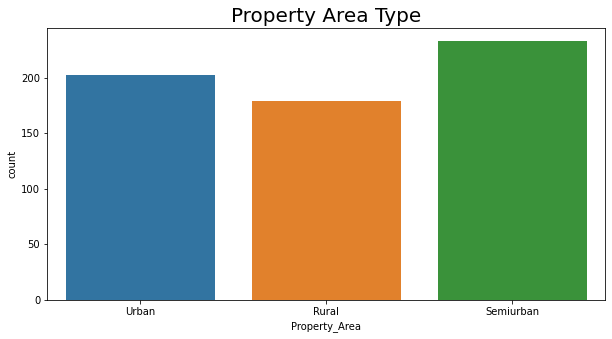

In [62]:
plt.figure(figsize = (10,5))
sns.countplot(x="Property_Area", data=df)
plt.title("Property Area Type", fontsize = 20)
plt.show()

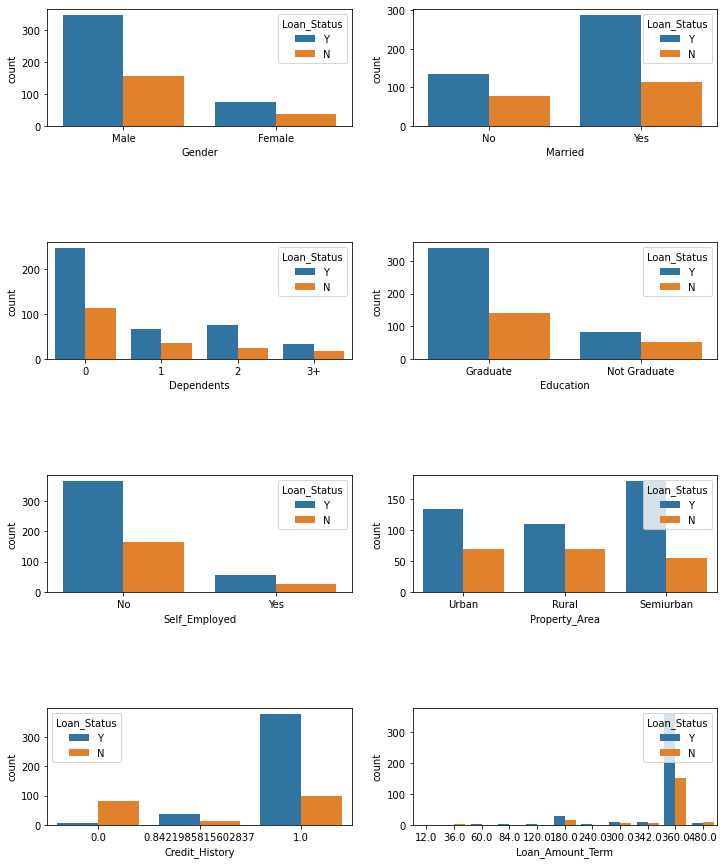

In [66]:
label_list=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    sns.countplot(x=cat,data=df,hue='Loan_Status',ax=axes[row,col]) #Plotting count plot with hue Loan Status
plt.subplots_adjust(hspace=1) # Plotting the graphs

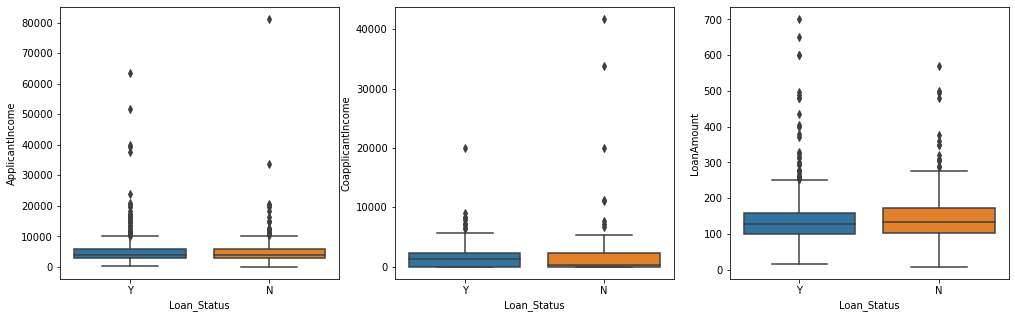

In [71]:
label_list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(17,5)) #size of plot
for i,cat_col in enumerate(label_list):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[i])
    plt.subplots_adjust(hspace=1) #plotting the graph

In [72]:
#Dropping Loan_ID 
df.drop('Loan_ID',axis=1,inplace=True)

In [80]:
#Let’s perform label encoding to convert object type columns into numeric type

label_list=list(df.select_dtypes(['object']).columns)
le=LabelEncoder()
for i in label_list:
    df[i] = le.fit_transform(df[i])

In [81]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [82]:
#Skewness of these columns are too high, let’s reduce the skewness using PowerTransformer


PT=PowerTransformer()
for i in df.columns:
    if df[i].dtype != "object":
        if ((len(pd.unique(df[i]))) > 3):
            if abs(df.loc[:,i].skew())>0.55:
                df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [84]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,-0.827104,0,0,0.544331,-1.102837,0.235387,0.185905,1.0,2,1
1,1,1,0.854259,0,0,0.170974,0.750578,-0.037659,0.185905,1.0,0,0
2,1,1,-0.827104,0,1,-0.499955,-1.102837,-1.346305,0.185905,1.0,2,1
3,1,1,-0.827104,1,0,-0.743873,0.891686,-0.167886,0.185905,1.0,2,1
4,1,0,-0.827104,0,0,0.582817,-1.102837,0.158610,0.185905,1.0,2,1


In [85]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,-0.827104,0,0,-0.554885,-1.102837,-1.205100,0.185905,1.0,0,1
610,1,1,1.522278,0,0,-0.000290,-1.102837,-2.293317,-2.308570,1.0,0,1
611,1,1,0.854259,0,0,1.023487,0.208603,1.372409,0.185905,1.0,2,1
612,1,1,1.316702,0,0,0.931750,-1.102837,0.738924,0.185905,1.0,2,1
613,0,0,-0.827104,0,1,0.170974,-1.102837,0.039936,0.185905,0.0,1,0


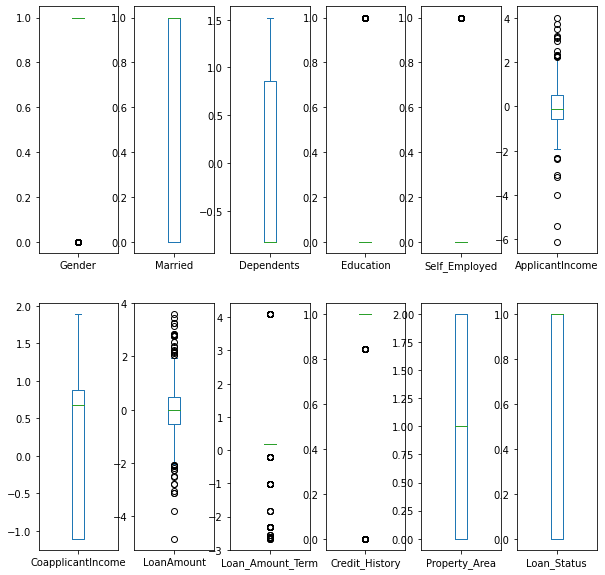

In [90]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))
plt.show()

In [92]:
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
       185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
       443, 468, 500, 500, 516, 555, 561, 568, 573, 600], dtype=int64), array([7, 8, 7, 8, 7, 8, 7, 5, 7, 8, 5, 7, 8, 5, 5, 5, 8, 8, 8, 8, 5, 8,
       8, 7, 8, 5, 5, 5, 5, 8, 8, 7, 7, 7, 8, 5], dtype=int64))


In [103]:
#Removing the outliers
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)
df=new_d

(614, 12)
(582, 12)


In [104]:
#lets separated dependent and independent variables

x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [105]:
x.shape

(582, 11)

In [106]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,-0.827104,0,0,0.544331,-1.102837,0.235387,0.185905,1.0,2
1,1,1,0.854259,0,0,0.170974,0.750578,-0.037659,0.185905,1.0,0
2,1,1,-0.827104,0,1,-0.499955,-1.102837,-1.346305,0.185905,1.0,2
3,1,1,-0.827104,1,0,-0.743873,0.891686,-0.167886,0.185905,1.0,2
4,1,0,-0.827104,0,0,0.582817,-1.102837,0.158610,0.185905,1.0,2


In [107]:
y.shape

(582,)

In [108]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 582, dtype: int32>

In [110]:

scaler=MinMaxScaler() #Initializting MinMaxScaler
scale_x=scaler.fit_transform(x) #fitting our data into MinMaxScaller
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.545946,0.000000,0.539193,1.0,1.0,1.0
1,1.0,1.0,0.715662,0.0,0.0,0.476224,0.635331,0.491004,1.0,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.350934,0.000000,0.260047,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.305384,0.683702,0.468021,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.553133,0.000000,0.525643,1.0,1.0,1.0


In [111]:
#now all variables are scaled

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc

In [143]:
maxAccu=0
maxRS=0
for i in range(1,1450):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
if acc>maxAccu:
    
    maxAccu=acc
    maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8285714285714286  on Random_state  1449


In [144]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [146]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("***********************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("***********************************************************")

***********************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8285714285714286
[[ 25  28]
 [  2 120]]
              precision    recall  f1-score   support

           0       0.93      0.47      0.62        53
           1       0.81      0.98      0.89       122

    accuracy                           0.83       175
   macro avg       0.87      0.73      0.76       175
weighted avg       0.85      0.83      0.81       175

[0.81196581 0.78632479 0.78448276 0.86206897 0.8362069 ]
0.8162098437960508
Difference between Accuracy score and cross validation score is -  0.012361584775377854
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
***********************************************************
***********************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> KNeighborsClassifier()
0.7942857142857143
[[

Random Forest Classifier have highest Accuracy more than 79 % and the difference between Cross Validation Score and Accuracy score it less. So Random Forest Classifier will be used here to learn model.

In [147]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
"max_features": [3,5,7,9],
"min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_ #Best parameters

{'min_samples_leaf': 3, 'max_features': 7, 'max_depth': 6}

In [148]:
clf_pred=clf.best_estimator_.predict(x_test)


In [149]:
accuracy_score(y_test,clf_pred)

0.8171428571428572

In [150]:
#lets look into classification
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8171428571428572
[[ 25  28]
 [  4 118]]
              precision    recall  f1-score   support

           0       0.86      0.47      0.61        53
           1       0.81      0.97      0.88       122

    accuracy                           0.82       175
   macro avg       0.84      0.72      0.75       175
weighted avg       0.82      0.82      0.80       175



In [151]:
#Plotting AUC ROC curve to see the false positive rate and true positive rate

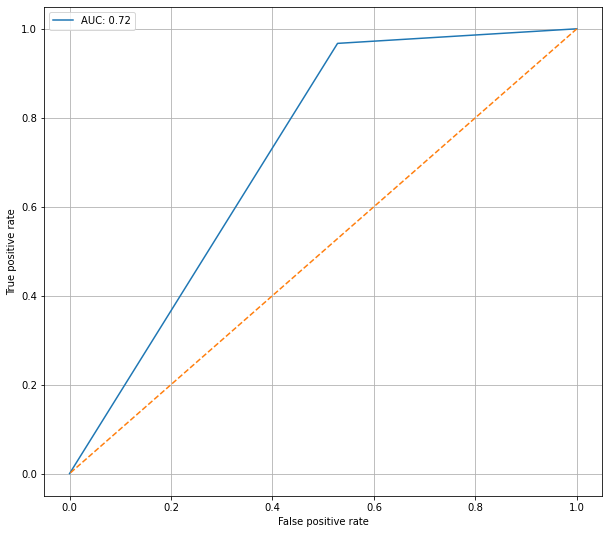

In [152]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid() #adding the grid

In [153]:
#saving model
import joblib
joblib.dump(clf.best_estimator_,"Loan.obj")
SVR_from_joblib=joblib.load("Loan.obj")
Predict = SVR_from_joblib.predict(x_test)
Predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

Concluding Remarks
In this case study, a Machine Learning model is developed to predict, whether loan should be approved or not. Here several features were mined from the dataset and combined together with the help of Machine Leaning, to do the loan application status prediction. With the help of the above techniques, proposed model is able to predict the status of the load with an accuracy score of 81%. However, there is still ways to do improvement in this model.

In the future, our model can be predict the status of the loan more accurately.